# 新手教程—Pandas库使用示例

以下内容是对pandas库的简要介绍，主要面向新用户，您可以访问http://pandas.pydata.org/pandas-docs/dev/10min.html 查看更多示例，如果您想更深入的学习pandas，推荐您查看《利用Python进行数据分析》一书。

In [1]:
#导入常用libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 31

## 数据结构

Pandas最重要的数据结构有Series和DataFrame，这里介绍series一些基本操作。

创建一个Series

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

创建一个DataFrame，包括一个numpy array, 时间索引和列名字。

In [2]:
dates = pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [3]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.451654,-1.669159,-0.716677,-0.311599
2013-01-02,1.834961,-0.612790,-0.376212,1.239693
2013-01-03,-0.422785,0.663677,0.878228,-0.132077
2013-01-04,-1.201822,1.054161,0.641047,0.166984
2013-01-05,1.953751,1.072182,-0.477465,0.514392
2013-01-06,0.181696,-1.068304,1.676052,0.322696


创建一个DataFrame，包括一个可以转化为Series的字典

In [4]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:            'B' : pd.Timestamp('20130102'),
   ....:            'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:            'D' : np.array([3] * 4,dtype='int32'),
   ....:            'E' : pd.Categorical(["test","train","test","train"]),
   ....:            'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1,2013-01-02,1,3,test,foo
1,1,2013-01-02,1,3,train,foo
2,1,2013-01-02,1,3,test,foo
3,1,2013-01-02,1,3,train,foo


In [5]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

可以完成自动补全功能，下面这是一个例子。

In [ ]:
df2.

## 查看数据

查看前几条数据

In [10]:
df.head()

,A,B,C,D
2013-01-01,2.108893,-0.510124,-0.226624,0.428265
2013-01-02,0.028505,-0.861493,-0.408337,2.683092
2013-01-03,-1.078374,-0.089949,0.495247,-0.906926
2013-01-04,-0.655445,0.779607,1.081739,1.917179
2013-01-05,-1.065963,1.852962,1.649544,0.318253


查看后几条数据

In [11]:
df.tail()

,A,B,C,D
2013-01-02,0.028505,-0.861493,-0.408337,2.683092
2013-01-03,-1.078374,-0.089949,0.495247,-0.906926
2013-01-04,-0.655445,0.779607,1.081739,1.917179
2013-01-05,-1.065963,1.852962,1.649544,0.318253
2013-01-06,0.687415,-0.798144,0.780510,-0.176025


In [12]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [13]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [14]:
df.values

array([[ 2.10889288, -0.51012447, -0.22662373,  0.42826453],
       [ 0.02850516, -0.86149264, -0.40833718,  2.68309202],
       [-1.07837404, -0.08994899,  0.49524732, -0.90692598],
       [-0.65544482,  0.77960699,  1.08173914,  1.91717896],
       [-1.06596263,  1.85296197,  1.64954395,  0.31825327],
       [ 0.6874145 , -0.79814426,  0.78050989, -0.1760253 ]])

In [15]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.004172,0.062143,0.562013,0.710640
std,1.236887,1.064482,0.783398,1.340351
min,-1.078374,-0.861493,-0.408337,-0.906926
25%,-0.963333,-0.726139,-0.046156,-0.052456
50%,-0.313470,-0.300037,0.637879,0.373259
75%,0.522687,0.562218,1.006432,1.544950
max,2.108893,1.852962,1.649544,2.683092


In [16]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,2.108893,0.028505,-1.078374,-0.655445,-1.065963,0.687415
B,-0.510124,-0.861493,-0.089949,0.779607,1.852962,-0.798144
C,-0.226624,-0.408337,0.495247,1.081739,1.649544,0.780510
D,0.428265,2.683092,-0.906926,1.917179,0.318253,-0.176025


In [17]:
df.sort(columns='B')

,A,B,C,D
2013-01-02,0.028505,-0.861493,-0.408337,2.683092
2013-01-06,0.687415,-0.798144,0.780510,-0.176025
2013-01-01,2.108893,-0.510124,-0.226624,0.428265
2013-01-03,-1.078374,-0.089949,0.495247,-0.906926
2013-01-04,-0.655445,0.779607,1.081739,1.917179
2013-01-05,-1.065963,1.852962,1.649544,0.318253


## 选择数据

In [18]:
df['A']

2013-01-01    2.108893
2013-01-02    0.028505
2013-01-03   -1.078374
2013-01-04   -0.655445
2013-01-05   -1.065963
2013-01-06    0.687415
Freq: D, Name: A, dtype: float64

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,2.108893,-0.510124,-0.226624,0.428265
2013-01-02,0.028505,-0.861493,-0.408337,2.683092
2013-01-03,-1.078374,-0.089949,0.495247,-0.906926


In [20]:
df['20130104':'20130106']

,A,B,C,D
2013-01-04,-0.655445,0.779607,1.081739,1.917179
2013-01-05,-1.065963,1.852962,1.649544,0.318253
2013-01-06,0.687415,-0.798144,0.780510,-0.176025


In [21]:
df.loc[dates[0]]

A    2.108893
B   -0.510124
C   -0.226624
D    0.428265
Name: 2013-01-01 00:00:00, dtype: float64

In [22]:
df.loc[:,['A','B']]

,A,B
2013-01-01,2.108893,-0.510124
2013-01-02,0.028505,-0.861493
2013-01-03,-1.078374,-0.089949
2013-01-04,-0.655445,0.779607
2013-01-05,-1.065963,1.852962
2013-01-06,0.687415,-0.798144


In [23]:
df.loc['20130101':'20130103','A':'B']

,A,B
2013-01-01,2.108893,-0.510124
2013-01-02,0.028505,-0.861493
2013-01-03,-1.078374,-0.089949


In [24]:
df.loc['20130101','A':'B']

A    2.108893
B   -0.510124
Name: 2013-01-01 00:00:00, dtype: float64

In [25]:
df.loc[dates[0],'A']

2.1088928765565074

In [26]:
df.at[dates[0],'A']

2.1088928765565074

In [27]:
df.iloc[3]

A   -0.655445
B    0.779607
C    1.081739
D    1.917179
Name: 2013-01-04 00:00:00, dtype: float64

In [22]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.385315,1.002269
2013-01-05,-0.276139,1.422227


In [23]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.643882,0.586507
2013-01-03,-0.660116,-0.278159
2013-01-05,-0.276139,0.168013


In [24]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.643882,0.483249,0.586507,-1.525807
2013-01-03,-0.660116,0.444498,-0.278159,-0.492252


In [25]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.166239,-1.229485
2013-01-02,0.483249,0.586507
2013-01-03,0.444498,-0.278159
2013-01-04,1.002269,-0.017041
2013-01-05,1.422227,0.168013
2013-01-06,-0.873137,-0.025599


In [26]:
df.iloc[1,1]

0.48324869963712741

In [27]:
df[df.A>0]

,A,B,C,D
2013-01-02,1.643882,0.483249,0.586507,-1.525807
2013-01-04,0.385315,1.002269,-0.017041,2.023510
2013-01-06,0.758207,-0.873137,-0.025599,0.845468


In [28]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.453450
2013-01-02,1.643882,0.483249,0.586507,NaN
2013-01-03,NaN,0.444498,NaN,NaN
2013-01-04,0.385315,1.002269,NaN,2.023510
2013-01-05,NaN,1.422227,0.168013,NaN
2013-01-06,0.758207,NaN,NaN,0.845468


In [29]:
df2=df.copy()

df2['E']=['one', 'one','two','three','four','three']

df2

,A,B,C,D,E
2013-01-01,-0.463576,-1.166239,-1.229485,0.453450,one
2013-01-02,1.643882,0.483249,0.586507,-1.525807,one
2013-01-03,-0.660116,0.444498,-0.278159,-0.492252,two
2013-01-04,0.385315,1.002269,-0.017041,2.023510,three
2013-01-05,-0.276139,1.422227,0.168013,-0.116013,four
2013-01-06,0.758207,-0.873137,-0.025599,0.845468,three


In [30]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.660116,0.444498,-0.278159,-0.492252,two
2013-01-05,-0.276139,1.422227,0.168013,-0.116013,four


In [28]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [31]:
df['F'] = s1

In [32]:
df.at[dates[0],'A'] = 0

In [33]:
df.iat[0,1] = 0

In [34]:
df.loc[:,'D'] = np.array([5] * len(df))

In [35]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.226624,5,NaN
2013-01-02,0.028505,-0.861493,-0.408337,5,1
2013-01-03,-1.078374,-0.089949,0.495247,5,2
2013-01-04,-0.655445,0.779607,1.081739,5,3
2013-01-05,-1.065963,1.852962,1.649544,5,4
2013-01-06,0.687415,-0.798144,0.780510,5,5


In [36]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.226624,-5,NaN
2013-01-02,-0.028505,-0.861493,-0.408337,-5,-1
2013-01-03,-1.078374,-0.089949,-0.495247,-5,-2
2013-01-04,-0.655445,-0.779607,-1.081739,-5,-3
2013-01-05,-1.065963,-1.852962,-1.649544,-5,-4
2013-01-06,-0.687415,-0.798144,-0.780510,-5,-5


## 缺失数据

缺失数据使用np.nan表示，默认不包括在计算内，可以通过下列方法更改缺失数据。

In [37]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1],'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.226624,5,NaN,1
2013-01-02,0.028505,-0.861493,-0.408337,5,1,1
2013-01-03,-1.078374,-0.089949,0.495247,5,2,NaN
2013-01-04,-0.655445,0.779607,1.081739,5,3,NaN


In [38]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.028505,-0.861493,-0.408337,5,1,1


In [39]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.226624,5,5,1
2013-01-02,0.028505,-0.861493,-0.408337,5,1,1
2013-01-03,-1.078374,-0.089949,0.495247,5,2,5
2013-01-04,-0.655445,0.779607,1.081739,5,3,5


In [40]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 统计

In [41]:
df.mean()#列计算

A   -0.347310
B    0.147164
C    0.562013
D    5.000000
F    3.000000
dtype: float64

In [42]:
df.mean(1)#行计算

2013-01-01    1.193344
2013-01-02    0.951735
2013-01-03    1.265385
2013-01-04    1.841180
2013-01-05    2.287309
2013-01-06    2.133956
Freq: D, dtype: float64

In [44]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates)#.shift(2)

s

2013-01-01     1
2013-01-02     3
2013-01-03     5
2013-01-04   NaN
2013-01-05     6
2013-01-06     8
Freq: D, dtype: float64

In [45]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)

s

2013-01-01   NaN
2013-01-02   NaN
2013-01-03     1
2013-01-04     3
2013-01-05     5
2013-01-06   NaN
Freq: D, dtype: float64

In [46]:
df.sub(s,axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.078374,-1.089949,-0.504753,4,1
2013-01-04,-3.655445,-2.220393,-1.918261,2,0
2013-01-05,-6.065963,-3.147038,-3.350456,0,-1
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.226624,5,NaN
2013-01-02,0.028505,-0.861493,-0.408337,5,1
2013-01-03,-1.078374,-0.089949,0.495247,5,2
2013-01-04,-0.655445,0.779607,1.081739,5,3
2013-01-05,-1.065963,1.852962,1.649544,5,4
2013-01-06,0.687415,-0.798144,0.780510,5,5


In [47]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.226624,5,NaN
2013-01-02,0.028505,-0.861493,-0.634961,10,1
2013-01-03,-1.049869,-0.951442,-0.139714,15,3
2013-01-04,-1.705314,-0.171835,0.942026,20,6
2013-01-05,-2.771276,1.681127,2.591569,25,10
2013-01-06,-2.083862,0.882983,3.372079,30,15


In [50]:
df.apply(lambda x: x.max() - x.min())

A    1.765789
B    2.714455
C    2.057881
D    0.000000
F    4.000000
dtype: float64

In [51]:
s = pd.Series(np.random.randint(0,7,size=10))

s

0    3
1    2
2    5
3    6
4    0
5    5
6    5
7    0
8    3
9    2
dtype: int64

In [52]:
s.value_counts()#统计频率

5    3
3    2
2    2
0    2
6    1
dtype: int64

In [53]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 规整 Merge

### concat

In [54]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,1.592374,0.655436,0.951883,-0.317604
1,0.998669,0.396345,0.554562,-0.213849
2,0.598832,-0.795983,-0.581768,0.241221
3,-0.081055,0.206142,1.143169,-0.749618
4,1.427974,-1.996137,-2.494941,-2.499584
5,-0.568733,-0.691511,-0.316464,0.149466
6,1.123894,-0.875845,2.322487,-0.676746
7,-2.862173,-0.679058,-1.556605,-1.727630
8,0.009725,-1.435217,-0.225359,2.155263
9,0.139717,0.580340,0.457227,0.132505


In [55]:
# break it into pieces

pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,1.592374,0.655436,0.951883,-0.317604
1,0.998669,0.396345,0.554562,-0.213849
2,0.598832,-0.795983,-0.581768,0.241221
3,-0.081055,0.206142,1.143169,-0.749618
4,1.427974,-1.996137,-2.494941,-2.499584
5,-0.568733,-0.691511,-0.316464,0.149466
6,1.123894,-0.875845,2.322487,-0.676746
7,-2.862173,-0.679058,-1.556605,-1.727630
8,0.009725,-1.435217,-0.225359,2.155263
9,0.139717,0.580340,0.457227,0.132505


### merge

In [56]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [57]:
left

,key,lval
0,foo,1
1,foo,2


In [59]:
right

,key,rval
0,foo,4
1,foo,5


In [58]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### append

In [60]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

df

,A,B,C,D
0,1.247717,-1.612009,0.472290,0.201178
1,1.100179,0.161626,-0.321770,0.474538
2,-0.119958,-1.389366,0.494838,0.182669
3,-0.101885,-1.178154,0.109359,0.505889
4,-0.064535,0.084794,0.213919,-0.222954
5,-1.563538,1.374349,1.617262,1.060599
6,1.353898,-0.560971,0.625005,-0.024575
7,-0.349520,-0.441983,-2.094049,1.159827


In [61]:
s = df.iloc[3]

df.append(s, ignore_index=True)

,A,B,C,D
0,1.247717,-1.612009,0.472290,0.201178
1,1.100179,0.161626,-0.321770,0.474538
2,-0.119958,-1.389366,0.494838,0.182669
3,-0.101885,-1.178154,0.109359,0.505889
4,-0.064535,0.084794,0.213919,-0.222954
5,-1.563538,1.374349,1.617262,1.060599
6,1.353898,-0.560971,0.625005,-0.024575
7,-0.349520,-0.441983,-2.094049,1.159827
8,-0.101885,-1.178154,0.109359,0.505889


In [62]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})
   ....: 
        
df

,A,B,C,D
0,foo,one,-0.698394,0.176046
1,bar,one,0.643372,-0.026620
2,foo,two,1.127251,-0.321595
3,bar,three,1.290459,-0.010702
4,foo,two,0.836285,-0.346573
5,bar,two,0.981900,-1.203876
6,foo,one,1.527603,1.903233
7,foo,three,0.880489,0.347362


## Grouping

In [63]:
df.groupby('A').sum()

,C,D
A,,
bar,2.915732,-1.241198
foo,3.673235,1.758473


In [64]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.643372 -0.026620
    three  1.290459 -0.010702
    two    0.981900 -1.203876
foo one    0.829210  2.079279
    three  0.880489  0.347362
    two    1.963536 -0.668168

## Stack

In [69]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
   ....: 
        
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df2 = df[:4]

df2

A         B
first second                    
bar   one    -0.599411  0.511343
      two     0.915159  0.096236
baz   one    -0.235927  0.837185
      two    -0.399887 -0.393647

In [70]:
stacked = df2.stack()

stacked 

first  second   
bar    one     A   -0.599411
               B    0.511343
       two     A    0.915159
               B    0.096236
baz    one     A   -0.235927
               B    0.837185
       two     A   -0.399887
               B   -0.393647
dtype: float64

In [71]:
stacked.unstack()

A         B
first second                    
bar   one    -0.599411  0.511343
      two     0.915159  0.096236
baz   one    -0.235927  0.837185
      two    -0.399887 -0.393647

In [72]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.599411  0.915159
      B  0.511343  0.096236
baz   A -0.235927 -0.399887
      B  0.837185 -0.393647

In [73]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.599411 -0.235927
       B  0.511343  0.837185
two    A  0.915159 -0.399887
       B  0.096236 -0.393647

In [74]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
   .....: 
        
df 

,A,B,C,D,E
0,one,A,foo,-0.127958,1.228190
1,one,B,foo,0.149878,-0.197303
2,two,C,foo,-1.586735,0.635435
3,three,A,bar,-0.174615,0.014008
4,one,B,bar,0.226525,-0.045204
5,one,C,bar,-1.540367,-0.612553
6,two,A,foo,0.006047,-0.089030
7,three,B,foo,1.037414,-0.895084
8,one,C,foo,1.542884,-0.695924
9,one,A,bar,-2.256235,0.645135


In [75]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -2.256235 -0.127958
      B  0.226525  0.149878
      C -1.540367  1.542884
three A -0.174615       NaN
      B       NaN  1.037414
      C  0.751396       NaN
two   A       NaN  0.006047
      B -0.128245       NaN
      C       NaN -1.586735

## Time Series

In [7]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample('5Min', how='sum')

2012-01-01    21469
Freq: 5T, dtype: int64

In [78]:
ts

2012-01-01 00:00:00    312
2012-01-01 00:00:01     67
2012-01-01 00:00:02    256
2012-01-01 00:00:03    486
2012-01-01 00:00:04    485
2012-01-01 00:00:05    210
2012-01-01 00:00:06    238
2012-01-01 00:00:07    484
2012-01-01 00:00:08    280
2012-01-01 00:00:09    223
2012-01-01 00:00:10     95
2012-01-01 00:00:11    254
2012-01-01 00:00:12    436
2012-01-01 00:00:13    234
2012-01-01 00:00:14    337
                      ... 
2012-01-01 00:01:25    176
2012-01-01 00:01:26     92
2012-01-01 00:01:27    355
2012-01-01 00:01:28    486
2012-01-01 00:01:29    270
2012-01-01 00:01:30    215
2012-01-01 00:01:31    165
2012-01-01 00:01:32    449
2012-01-01 00:01:33    373
2012-01-01 00:01:34    386
2012-01-01 00:01:35    271
2012-01-01 00:01:36     17
2012-01-01 00:01:37     89
2012-01-01 00:01:38    108
2012-01-01 00:01:39    131
Freq: S, dtype: int64

In [3]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
 
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    0.167706
2012-03-07   -1.507317
2012-03-08    0.382276
2012-03-09    2.126438
2012-03-10    0.415160
Freq: D, dtype: float64

In [4]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00    0.167706
2012-03-07 00:00:00+00:00   -1.507317
2012-03-08 00:00:00+00:00    0.382276
2012-03-09 00:00:00+00:00    2.126438
2012-03-10 00:00:00+00:00    0.415160
Freq: D, dtype: float64

In [5]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.167706
2012-03-06 19:00:00-05:00   -1.507317
2012-03-07 19:00:00-05:00    0.382276
2012-03-08 19:00:00-05:00    2.126438
2012-03-09 19:00:00-05:00    0.415160
Freq: D, dtype: float64

In [6]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31   -0.110541
2012-02-29    0.558980
2012-03-31   -0.438710
2012-04-30   -1.489807
2012-05-31    0.175205
Freq: M, dtype: float64

In [7]:
ps = ts.to_period()

ps

2012-01   -0.110541
2012-02    0.558980
2012-03   -0.438710
2012-04   -1.489807
2012-05    0.175205
Freq: M, dtype: float64

In [8]:
ps.to_timestamp()

2012-01-01   -0.110541
2012-02-01    0.558980
2012-03-01   -0.438710
2012-04-01   -1.489807
2012-05-01    0.175205
Freq: MS, dtype: float64

In [9]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

ts.head()

1990-03-01 09:00   -2.013458
1990-06-01 09:00   -1.760266
1990-09-01 09:00   -1.266192
1990-12-01 09:00   -0.665547
1991-03-01 09:00    1.581657
Freq: H, dtype: float64

## Categoricals

In [10]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [11]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [12]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [13]:
df.sort("grade")

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [14]:
df.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

## Plotting

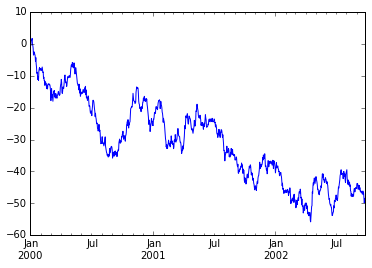

In [15]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()

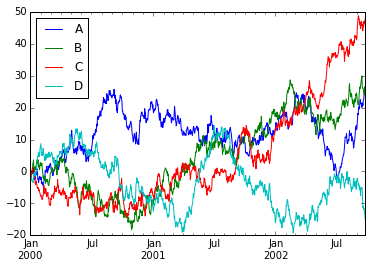

In [16]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
   .....: 
        
df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')